**Name: Christ-Brian Amedjonekou**  
**Date: 4/08/2019**  
**TCET 3102-E316 (Analog and Digital Communications) Lab 3**  
**Spring 2019, Section: E316, Code: 37251**  
**Instructor: Song Tang**

### Objective

* Design a low pass elliptic filter to receive desired output (filtered signal), where the input will be a square wave signal.

### Equipment 

* Computer Software

### Theory

* The subscriber loop is the most critical component of a telephone network. They're created through the use of two copper wires.


* We can created an equivalent circuit for the subscriber loop through the use of a low pass filter. The bandwidth of this filter can be calculated w/ the following formula: $$\space$$ $$\omega_c = \frac{1}{RC} = 0.707$$  $$\space$$ 


* $0.707$ is the maximum magnitude and the cuttoff frequency


* For telephone networks, the bandwidth of the of subscriber loop is enough to support signal transmissions of the range **0 - 4 kHZ**. Also, to further improve quality of transmissions, designers use loading coils to flatten attuentuation-frequency characters of the loop. This was how telephone networks used to function.


* A problem arises, however, with the arrival of the digital era. Since digital signals are pulse waveforms they have a spectrum much larger that the range mentioned above. The objective of our experiment is determine the reponse of digital signals through the subscriber loops.

### Modules (Packages)

In [19]:
# These are the packages I'll need to solve this problem
import math as m
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import ellip, freqz, lfilter

### Variables for time domain plot

In [2]:
# These variables are used to create the fourier series
# Start and Stop indicates my domain for my sampling frequency [samplingfreq; (F_S)]
# 100 points.
# n1, n2 are the amount of harmonics I want.
start, stop, n, samplingfreq = 1, 101, 15, 100 

# 't' is for time, and is used to create my 100 Hz time vector
t = np.arange(start, stop, .001) / samplingfreq

# 'A' represents the amplitude 2 volts
A = 2

# 'fundamental' is the DC component of the Fourier Series 
fundamental = A/2

# 'signalfreq' is the Signal Frequency (f_0)
signalfreq = 1 

# 'omega' is the Angular Velocity (w_0)
omega = 2 * np.pi * signalfreq

# Lambda function 
template = lambda p: ((2*A)/(np.pi*(2*p+1))) * np.sin((2*p+1) * omega * t)

# harmonics1, harmonics2 are AC component of the Fourier series
harmonics = sum([template(p) for p in range(n+1)])

# ffs1, ffs2 are the fourier series
ffs = lambda n: (fundamental + harmonics)

### RUN 1: Synthesis Square Wave

* **Step 1: This is using the square wave from Lab 1**

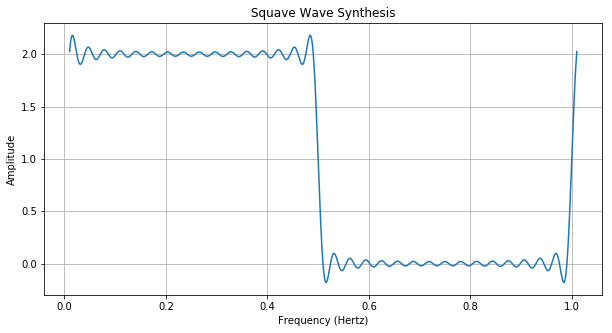

In [3]:
# Creates figure 1 and its subplot 
fig1, ax1 = plt.figure(figsize= (10,5)), plt.subplot()
ax1.plot(t, ffs(n))
ax1.set(xlabel= 'Frequency (Hertz)', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis');
ax1.grid(True)

### RUN 2: Elliptic (Cauer) Filter Design

* **Step 1: Plot the Elliptic (Cauer) Filter**

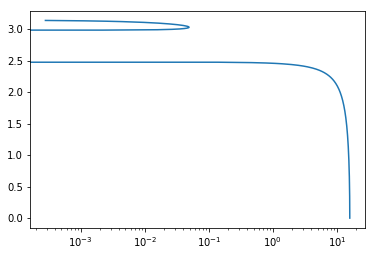

In [18]:
# Elliptical order, 'm'
m = 3

# Decibels of the ripple in passband, 'rP'
rP = 0.1

# Decibels of the ripple in stopband, 'rS'
rS = 40

# The Cutoff Filter Frequency, 'omega_N', normalized to Nyquist Frequency
# 'omega_N = 1' cooresponds to half the sampling frequency
# When the frequency equals to 'omega_N' the filter's magnitude response is
# equal to the ripple in passband, 'rP' (decibels)

omega_N = 0.8

# in-built scipy function for the Elliptic (Cauer) Filter 
b, a = ellip(m, rP, rS, omega_N)

# displays the magnitude and phase of the filter, normalized to Nyquist Frequency
H, omega = freqz(b, a)
xval = (omega * samplingfreq)/(2 * np.pi)
yval = abs(H)
plt.semilogx(xval, yval)


### RUN 3: Filter Input Signals

* **Step 1: Observe the filtering effect in the time domain**

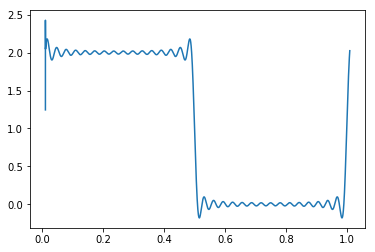

In [22]:
sf = lfilter(b, a, ffs(n))
plt.plot(t, sf)

* **Step 2: Observe the filtering effect in the frequency domain**

In [ ]:
S = fft(ffs(n), 512)
SF = fft(sf, 512)
f =

### Lab Questions/Requirements

1. **Depict signals $2 \sin(628 \text{t})$ and $2 \cos(628 \text{t})$ both in the time domain and the frequency domain. In the frequency domain, show both axes with angular velocity $(\omega)$ and frequency $\big(f\big)$**

#### CODE 

In [ ]:
#### Creates an array with values for the functions 2sin(628t) and 2cos(628t)
start, stop, n1, n2, samplingfreq = 0, 100, 9, 29, 10000 
t = np.arange(start, stop, .001) / samplingfreq
sine = 2 * np.sin(628 * t)
cosine = 2 * np.cos(628 * t)

#### Plot for $2\sin(628*t)$

In [ ]:
# Subplot 1

fig8, ax8 = plt.figure(figsize= (10, 10)), plt.subplot(3, 1, 1)
ax8.plot(t, sine)
ax8.set(xlabel = 'Time', ylabel= 'f(t)', title= 'f(t) = 2sin(628t)')
ax8.grid(True)

# Subplot 2

bx8 = plt.subplot(3, 1, 2)
bx8.plot([100, 100],[0, 2], color= 'b', lw= 3)
bx8.set(xlabel = 'Frequency', ylabel= 'Voltage', 
        title= 'f(t) = 2sin(628t)', 
        ylim = (0, 4))
bx8.grid(True)

# Subplot 3

cx8 = plt.subplot(3, 1, 3)
cx8.plot([0, 0],[0, 2], color= 'c', lw= 9)
cx8.set(xlabel = 'Angular Velocity', ylabel= 'Voltage', 
        title= 'f(t) = 2sin(628t)', 
        xlim= (0, 4), ylim = (0, 4))
cx8.grid(True)
plt.subplots_adjust(hspace=0.5)

#### Plot for $2\cos(628*t)$

In [ ]:
# Subplot 1

fig9, ax9 = plt.figure(figsize= (10, 10)), plt.subplot(3, 1, 1)
ax9.plot(t, cosine)
ax9.set(xlabel = 'Time', ylabel= 'Voltage', title= 'f(t) = 2cos(628t)')
ax9.grid(True)

# Subplot 2

bx9 = plt.subplot(3, 1, 2)
bx9.plot([100, 100],[0, 2], color= 'b', lw= 3)
bx9.set(xlabel = 'Frequency', ylabel= 'Voltage', title= 'f(t) = 2sin(628t)', 
        ylim= (0, 4))
bx9.grid(True)

# Subplot 3

cx9 = plt.subplot(3, 1, 3)
cx9.plot([np.pi/2, np.pi/2],[0, 2], color= 'c', lw= 3)
cx9.set(xlabel = 'Angular Velocity', ylabel= 'Voltage', title= 'f(t) = 2sin(628t)', 
        xlim= (0, 4), ylim = (0, 4))
cx9.grid(True)
plt.subplots_adjust(hspace=0.5)

2. **Square Wave Analysis: using *Python* generate a square wave with *A = 2 Volts* and *T = 1 ms*.** 

    * Check RUN 1, step 1 and associated code for the results

3. **Based on the experimental results, how do the number of harmonic terms included in the square wave synthesis influence the waveform? Show waveform w/ different number of series terms to explain your answer.**

    * Basically, the more harmonics you have the more square your wave looks.
    * Check RUN 2 step 1 for the plot demonstrating this phenomenon. 

4. **Vary $F_S$ and $f_0$ and observe their influence on the waveform. Show figure and explain.**

    * Check figure in RUN 2, Step 2 to observe the influence of varying $F_S$ and $f_0$ on the waveform
    * As aforementioned, by changing the signal frequency ($f_0$) you must also change the sampling frequency ($F_S$) by the equivalent scale in order to obtain a similar waveform shape as the previous unscaled waveform. Anything else produces a quirky wavefore or more as shown below:
    
#### Code

In [ ]:
# These variables are used to create the fourier series
# Start and Stop indicates my domain for my sampling frequency [samplingfreq; (F_S)], 100 points.
# n1, n2 are the amount of harmonics I want.
start, stop, n1, n2, samplingfreq1, samplingfreq2 = 0, 100, 29, 29, 10000, 1000 

# 't' is for time, and is used to create my 100 Hz time vector
t1 = np.arange(start, stop, .001) / samplingfreq1
t2 = np.arange(start, stop, .001) / samplingfreq2

# 'A' represents the amplitude 2 volts
A = 2

# 'fundamental' is the DC component of the Fourier Series 
fundamental = A/2

# 'signalfreq' is the Signal Frequency (f_0)
signalfreq1, signalfreq2 = 10, 100 

# 'omega' is the Angular Velocity (w_0)
omega1 = 2 * np.pi * signalfreq1
omega2 = 2 * np.pi * signalfreq2

# Lambda function 
template = lambda p, t, omega: ((2*A)/(np.pi*(2*p+1))) * np.sin((2*p+1) * omega * t)

# harmonics1, harmonics2 are AC component of the Fourier series
harmonics1 = sum([template(p, t1, omega1) for p in range(n1+1)])
harmonics2 = sum([template(p, t2, omega2) for p in range(n2+1)])

# ffs1, ffs2 are the fourier series
ffs1 = lambda n: (fundamental + harmonics1)
ffs2 = lambda w: (fundamental + harmonics2)

#### Plot

In [ ]:
# Creates figure and its subplots 
# Subplot 1
fig6, ax6 = plt.figure(figsize= (10,5)), plt.subplot()
ax6.plot(t1, ffs1(n1))
ax6.set(xlabel= 'Frequency (Hertz)', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis')
ax6.grid(True)

# Subplot 2
fig7, ax7 = plt.figure(figsize= (10,5)), plt.subplot()
ax7.plot(t2, ffs2(n2), color= 'tab:red')
ax7.set(xlabel= 'Frequency (Hertz)', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis');
ax7.grid(True)